# South African Language Identification Hack 2023

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## Description

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

Language IDs
- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---


---

In [22]:
#libraries for importing and loading data
import pandas as pd
import numpy as np
#libaries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#libaries for data preparation 
import re
import string
import spacy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer as tf_idf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

#libraries for model building and preparation 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
#Libraries for measuring model accuracy 
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score
#Global parameter for reproducibility
Random_state= 42

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

---

In [23]:
#Loading the data set 
df_train= pd.read_csv("train_set.csv")
df_test= pd.read_csv("test_set.csv")
submission_csv= pd.read_csv("sample_submission.csv")

The train_set, test_set, sample_submission csv set has been loaded and stored into df_train, df_test, submission_csv variable respectively.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    



In [24]:
#Quick View of all the data set 
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [25]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [26]:
submission_csv.head()

,index,lang_id
0,1,tsn
1,2,nbl


### Univariate or Non Graphical Analysis

In [27]:
# geting General infomation on train data set 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [28]:
#Getting General information on  test data set 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [29]:
# Checking for missing Values 
df_train.isna().sum()

lang_id    0
text       0
dtype: int64

In [30]:
df_test.isna().sum()

index    0
text     0
dtype: int64

In [31]:
# Checking for unique Values and the number of time is occured 
df_train.lang_id.nunique()

11

This analysis shows that :
- there are 11 languages in south africa 

### Graphical Analysis 

In [32]:
df_train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

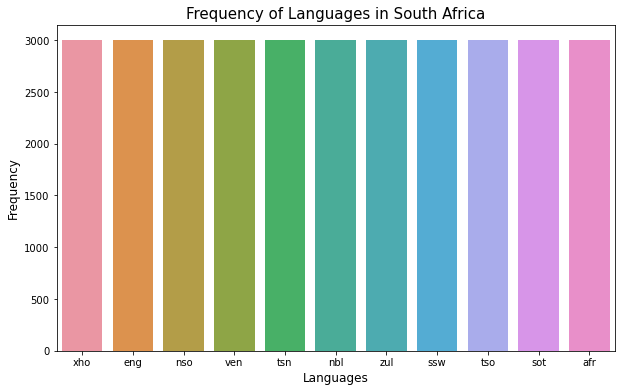

In [33]:
#ploting the distribution of unique label values
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="lang_id", data=df_train)
ax.set_title("Frequency of Languages in South Africa", fontsize = 15)
plt.xlabel("Languages",fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [13]:
#checking for duplicate text in the data set 
df_train.describe(include='all')

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [14]:
df_test.describe(include= "all")

,index,text
count,5682.000000,5682
unique,NaN,5459
top,NaN,Hoekom moet Onderhoud Betaal word?
freq,NaN,6
mean,2841.500000,NaN
std,1640.396446,NaN
min,1.000000,NaN
25%,1421.250000,NaN
50%,2841.500000,NaN
75%,4261.750000,NaN


In [15]:
#identification and estimation of Duplicate datas in train data set 
df_train.text.duplicated(keep="first").value_counts()

False    29948
True      3052
Name: text, dtype: int64

In [16]:
#identification and estimation of Duplicate datas in train data set 
df_test["text"].duplicated (keep="first").value_counts()

False    5459
True      223
Name: text, dtype: int64

This shows that the trains data sets contains 3052 duplicate data set while the test data set contains 223 duplicates

In [65]:
#Since countvectorizer is capable of cleaning the text with one click , Then why stress 
cvs = CountVectorizer(analyzer= 'word')
trans= cvs.fit_transform(df_train['text'])
Tokens_df_train= pd.DataFrame(cvs.get_feature_names_out(), columns= ["Tokens"])
# converting to String 
Tokens_df_train=Tokens_df_train.astype('string')

In [66]:
Tokens_df_train

,Tokens
0,aa
1,aabameli
2,aaent
3,aak
4,aan
...,...
141953,ṱuṱuwedzaho
141954,ṱuṱuwedze
141955,ṱuṱuwedzea
141956,ṱuṱuwedzwa


This shows that the train data set contains 141958 unique words 

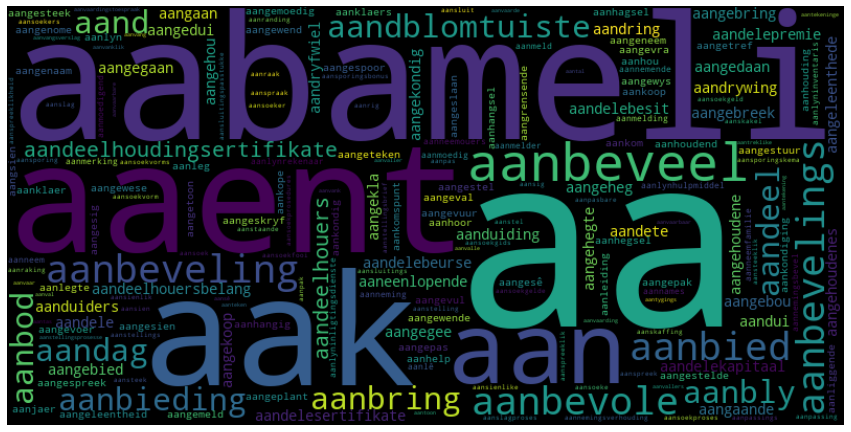

In [73]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(frequencies = Counter(Tokens_df_train["Tokens"]))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In [17]:
#Removal of Duplicate datas in the train_data set
df_train.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True)
df_train.describe()

,lang_id,text
count,29948,29948
unique,11,29948
top,eng,umgaqo-siseko wenza amalungiselelo kumaziko ax...
freq,2998,1


In [18]:
#Removal of Duplicate datas in the test_data set
df_test.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True)
df_test.describe()

,index
count,5459.000000
mean,2805.201685
std,1641.426767
min,1.000000
25%,1378.000000
50%,2784.000000
75%,4220.500000
max,5682.000000


In [19]:
#seperating predictor variables from target Variables 
X= df_train["text"]
y= df_train["lang_id"]

In [20]:
#spliting into the train data set for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#using TF_IDF
tfidf= tf_idf()
tf_xtrain= tfidf.fit_transform(X_train)
tf_xtest= tfidf.transform(X_test)

In [22]:
#using countVectorize(was not used)
cv= CountVectorizer()
cv_xtrain= cv.fit_transform(X_train)
cv_xtest= cv.transform(X_test)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In [23]:
def Model_builder (X_train,X_test, y_train,y_test ):
    """
    This is a function that take in four input and produces a dataframe that contains five models names and its accuracy
     X_train: independent variable for training
             datatype: series()
    y_train: dependent variable for training
             datatype: series
    X_val: independent variable for validation
           datatype: series
    y_val: dependent variable for validation
           datatype: series
    NB: All input should already be converted to numeral by tf_idf
    """
    pipeline_lr=Pipeline([('lr_classifier',LogisticRegression())])
    pipeline_Knn=Pipeline([('knn_classifier',KNeighborsClassifier(3))])
    pipeline_SVC=Pipeline([('SVC_classifier',SVC())])
    pipeline_Nb=Pipeline([('Nb_classifier',MultinomialNB())])
    pipeline_Rf=Pipeline([('Rf_classifier',RandomForestClassifier())])
    pipelines = [pipeline_lr, pipeline_Knn, pipeline_SVC,pipeline_Nb, pipeline_Rf]
     #Dictionary of pipelines and classifier types for ease of reference
    pipe_dict = {0: 'Logistic Regression', 1: 'kNeighbors', 2: 'SVC', 3: "Naives Bayes", 4:"Random forest"}
    pipelines = [pipeline_lr, pipeline_Knn, pipeline_SVC,pipeline_Nb, pipeline_Rf]
    # Fit the pipelines
    result= []
    for pipe in pipelines:
        pipe.fit(X_train, y_train)
    for i,model in enumerate(pipelines):
        result.append([pipe_dict[i],model.score(X_test,y_test)])
    return pd.DataFrame(np.array(result), columns=["Model_name","Accuracy"])

In [24]:
#using the model_builder function to build models and saving the resulting dataframe as variable 
models= Model_builder(tf_xtrain,tf_xtest, y_train, y_test )

In [25]:
models

,Model_name,Accuracy
0,Logistic Regression,0.9938230383973289
1,kNeighbors,0.9537562604340568
2,SVC,0.9951585976627713
3,Naives Bayes,0.9973288814691152
4,Random forest,0.9839732888146911


In [26]:
models["Accuracy"]= models["Accuracy"].astype("float")

Text(0, 0.5, 'Accuracy')

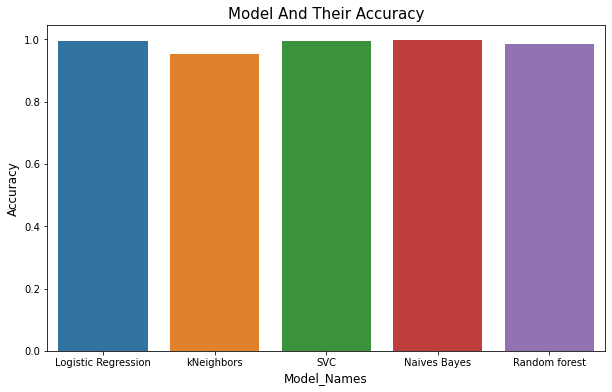

In [27]:
#ploting the distribution of unique label values
f, ax = plt.subplots(figsize=(10, 6))
ax= sns.barplot(data=models, x="Model_name", y="Accuracy")
plt.title('Model And Their Accuracy', fontsize= 15)
plt.xlabel('Model_Names', fontsize= 12 )
plt.ylabel('Accuracy', fontsize= 12)
                

five model where used in training the data set, which includes
 - LogisticRegression
 - KNeighborsClassifier
 - SelectVector classifier
 - MultinomialNB
 - RandomForest classifier 
 
 Naives Bayes MultinomialNB classifier performed best with a score of 99.98%, followed by SelectVector classifier which had a score of 99.5% while Kneighbors classifier performed the least with a score of 95.4%

## Hyperparameter Tune 

Due to size of the model and computational time to tune all the model , The best two model(Nayes Bayes and SVC) were chosen for hyperparameter tuning in order to increase the accuracy on un seen data

In [28]:
parameters = {  
'alpha': (10, 5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001 )  
}
clf= MultinomialNB()
grid_search= GridSearchCV(clf, parameters, cv=10, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(tf_xtrain,y_train)
pred_Nb= grid_search.predict(tf_xtest)
print(classification_report(y_test, pred_Nb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       1.00      1.00      1.00       603
         nbl       1.00      1.00      1.00       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      1.00      1.00       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       1.00      0.99      1.00       503
         zul       1.00      1.00      1.00       612

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990



In [29]:
grid_search.best_params_

{'alpha': 0.1}

In [30]:
parameters = {'C':(0.25,1.0),
              'gamma': (1,2)}
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(tf_xtrain,y_train)
pred_svc= clf.predict(tf_xtest)
print(classification_report(y_test, pred_Nb))

KeyboardInterrupt: 

After hyperparameter tuning the two best models, Naives Bayes Multinomial acuracy increased to 100% compared to SVC which gas an accuracy of 99%,  Thus making Naives overall best model for the job. *Naive Bayes really  isn't naive*

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



---

Based on the results, it can be concluded that the Naives Bayes Multinomial is the most appropriate model to use when creating a text classification model for the 11 languages spoken in South Africa. This is because of its accuracy, high performance in solving multi-class problems, and use of in-text classification. Selectvector Machines, on the other hand, require a lot of computational time. 

